In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
sns.set()

In [2]:
train = pd.read_csv('train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [3]:
train

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0
...,...,...,...,...,...,...,...,...,...,...,...
1454,2174,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21.0
1455,2175,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20.0
1456,2176,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,22.0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0


In [23]:
test = pd.read_csv('test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      715 non-null    int64  
 1   hour                    715 non-null    int64  
 2   hour_bef_temperature    714 non-null    float64
 3   hour_bef_precipitation  714 non-null    float64
 4   hour_bef_windspeed      714 non-null    float64
 5   hour_bef_humidity       714 non-null    float64
 6   hour_bef_visibility     714 non-null    float64
 7   hour_bef_ozone          680 non-null    float64
 8   hour_bef_pm10           678 non-null    float64
 9   hour_bef_pm2.5          679 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 56.0 KB


In [19]:
test

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0
...,...,...,...,...,...,...,...,...,...,...
710,2148,1,24.6,0.0,2.4,60.0,1745.0,NaN,NaN,NaN
711,2149,1,18.1,0.0,1.0,55.0,2000.0,NaN,NaN,NaN
712,2165,9,23.3,0.0,2.3,66.0,1789.0,0.020,17.0,15.0
713,2166,16,27.0,0.0,1.6,46.0,1956.0,0.032,40.0,26.0


In [20]:
test.describe(include='all')

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
count,715.000000,715.000000,714.000000,714.000000,714.000000,714.000000,714.000000,680.000000,678.000000,679.000000
mean,1056.854545,11.472727,23.263305,0.051821,2.388515,56.668067,1359.494398,0.041196,36.930678,24.939617
std,625.574471,6.928427,4.039645,0.221820,1.171270,19.661880,614.171870,0.020656,12.641503,10.075857
min,0.000000,0.000000,14.600000,0.000000,0.000000,16.000000,126.000000,0.003000,9.000000,7.000000
25%,507.000000,5.500000,20.300000,0.000000,1.500000,42.000000,807.250000,0.027000,28.000000,17.000000
50%,1046.000000,11.000000,22.900000,0.000000,2.300000,55.000000,1489.000000,0.039000,35.000000,24.000000
75%,1616.500000,17.000000,26.375000,0.000000,3.275000,73.750000,2000.000000,0.052250,45.000000,31.000000
max,2177.000000,23.000000,33.800000,1.000000,5.900000,100.000000,2000.000000,0.138000,94.000000,69.000000


In [6]:
train.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [7]:
test.isnull().sum()

id                         0
hour                       0
hour_bef_temperature       1
hour_bef_precipitation     1
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

## Model training

In [8]:
#1. fillna with 0
train1 = train.fillna(0)
test1 = test.fillna(0)

train_x = train1.drop(['count'],axis = 1)
train_y = train1['count']

model=RandomForestRegressor(n_estimators=100)
model.fit(train_x,train_y)

pred = model.predict(test1)

In [10]:
#2. fillna with median values
from sklearn.impute import SimpleImputer
#Imputer = SimpleImputer(strategy = 'median')

for idx in train.columns:
    train[idx] = train[idx].fillna(value = train[idx].mean())
    
for idx in test.columns:
    test[idx] = test[idx].fillna(value = test[idx].mean())

train_x = train.drop(['count'],axis = 1)
train_y = train['count']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=20)
model = RandomForestRegressor()
model.fit(x_train, y_train)

print(model.score(x_train, y_train))
print(model.score(x_test, y_test))


pred = model.predict(test)


0.9680058691884426
0.8023758660721845


### Preprocessing method 3. Interpolation

In [11]:
train_x = train.drop(['count'],axis = 1)
train_y = train['count']


model=RandomForestRegressor(criterion = 'mse',  n_estimators=100) 
model.fit(train_x,train_y)


pred = model.predict(test)

In [12]:
#feature importance 
model.feature_importances_

array([0.02596449, 0.58261422, 0.18166169, 0.02048538, 0.02645938,
       0.03423799, 0.03366424, 0.04035008, 0.03149538, 0.02306715])

In [21]:
from sklearn.model_selection import GridSearchCV
train.interpolate(inplace=True)
test.fillna(0, inplace=True)

# drop less important features
X_train = train.drop(['count', 'id', 'hour_bef_windspeed', 'hour_bef_pm2.5'], axis=1)
Y_train = train['count']
test1 = test.drop(['id', 'hour_bef_windspeed', 'hour_bef_pm2.5'], axis=1)

In [28]:
model = RandomForestRegressor(criterion = 'mse',random_state=2020)
model.fit(x_train, y_train)

#predict with test set
y_pred_1 = model.predict(test1)

## Submission

In [29]:
submission = pd.read_csv('submission.csv')
submission['count'] = pred
submission

,id,count
0,0,96.48
1,1,228.66
2,2,82.12
3,4,34.25
4,5,73.81
...,...,...
710,2148,64.08
711,2149,71.75
712,2165,131.70
713,2166,169.05


In [30]:
submission.to_csv('submit1.csv',index = False)

### Visualization

Text(16, 150, 'leave work')

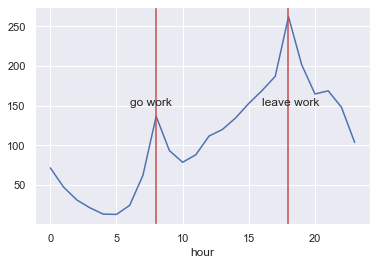

In [31]:
#The number of bikes depends on time
train.groupby(['hour'])['count'].mean().plot()
plt.axvline(x=8,color='r')
plt.axvline(x=18,color='r')
plt.text(6, 150, 'go work')
plt.text(16, 150, 'leave work')

In [32]:
train.groupby(['hour'])['count'].mean()

hour
0      71.766667
1      47.606557
2      31.409836
3      21.377049
4      13.524590
5      13.114754
6      24.557377
7      62.360656
8     136.688525
9      93.540984
10     78.803279
11     88.327869
12    111.901639
13    120.050000
14    134.590164
15    152.967213
16    169.100000
17    187.133333
18    262.163934
19    201.606557
20    164.868852
21    168.816667
22    148.245902
23    103.852459
Name: count, dtype: float64